In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

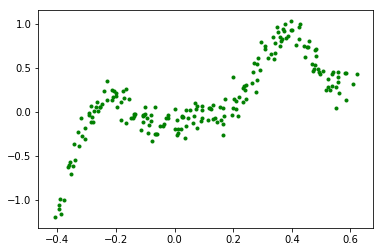

In [2]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
## sorting for better plotting
ind = np.argsort(x)
x = x[ind]
y = y[ind]

# good practice to zero-center x in linear mapping
x = x - 0.4#x.mean() 
# converting to matrix for neural network
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)


plt.scatter(x, y, marker='.', color='g')

In [3]:
import mylibrary.nnlib as tnn

### 2 layer network

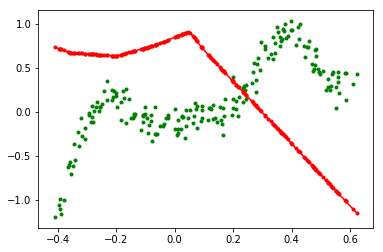

In [165]:
optim = tnn.Adam()
hid1=5
layer1 = tnn.NonLinearLayer(1,hid1, activation=tnn.LeakyRelu(), optimizer=optim)
layer1.bias = np.random.uniform(x.min(), x.max(), size=layer1.bias.shape)
layer2 = tnn.LinearLayer(hid1,1, optimizer=optim)
layer2.bias = np.random.uniform(x.min(), x.max(), size=layer2.bias.shape)

net1 = tnn.AutoForm()
net1.layerList = [layer1, layer2]

y_out = net1.forward(xx)
plt.scatter(x, y, marker='.', color='g')
plt.plot(x, y_out.reshape(-1), color='r')
plt.scatter(x, y_out.reshape(-1), marker='.', color='r')

((200, 6), (6, 1))

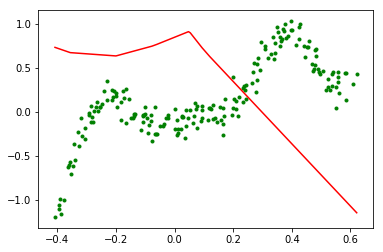

In [166]:
A1 = np.column_stack([np.ones((200,1)), layer1.output])
W2 = np.vstack([layer2.bias.reshape(-1,1), layer2.weights])
Y = A1@W2
plt.scatter(x, y, marker='.', color='g')
plt.plot(x, Y.reshape(-1), color='r')
A1.shape, W2.shape

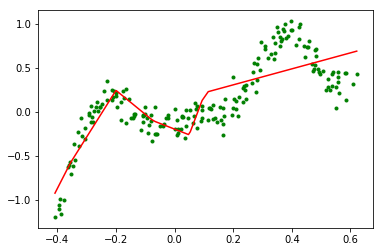

In [167]:
# print(W2)
W2_ = np.linalg.pinv(A1) @ yy
# print(W2_)
Y_ = A1@W2_
plt.scatter(x, y, marker='.', color='g')
plt.plot(x, Y_.reshape(-1), color='r')

(5, 1)


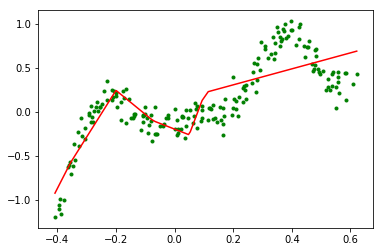

In [168]:
layer2.bias = W2_[0,:]
layer2.weights = W2_[1:,:]
print(layer2.weights.shape)
Y_ = net1.forward(xx)
plt.scatter(x, y, marker='.', color='g')
plt.plot(x, Y_.reshape(-1), color='r')

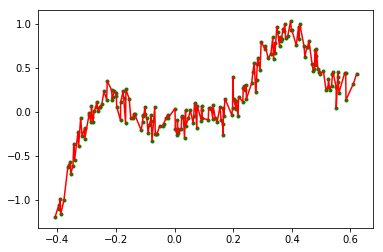

In [169]:
A1_ = yy@np.linalg.pinv(W2_)
Y_ = A1_@W2_
plt.scatter(x, y, marker='.', color='g')
plt.plot(x, Y_.reshape(-1), color='r')

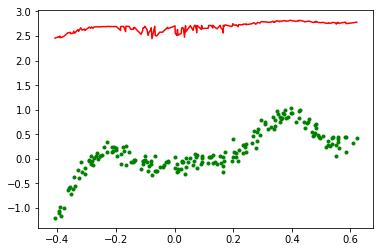

In [177]:
dA1 = A1 - A1_
da1 = dA1[:,1:]
layer1.backward(da1)
Z1_ = layer1.zee - layer1.del_zee
Y_ = layer2.forward(layer1.activation.forward(Z1_))
plt.scatter(x, y, marker='.', color='g')
plt.plot(x, Y_.reshape(-1), color='r')

In [ ]:

%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

for step in range(10000):
    a1 = net1.forward(xx)
    loss = tnn.MseLoss.loss(a1, yy)
    dy = tnn.MseLoss.del_loss(a1, yy)
    
    dx = net1.backward(dy)
    net1.update()
    
    if step % 10 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)
        
        ax.clear()
        plt.scatter(x, y, marker='.', color='g')
        plt.scatter(x, a1, marker='.', color='r')

        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

In [ ]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, a1, marker='.', color='r')

In [ ]:
loss1 = float(loss)
loss0, loss1

In [ ]:
layer1.weights, layer3.weights, layer1.bias, layer3.bias

### 1 layer network

In [ ]:
layer1a = tnn.NonLinearLayer(1,1,activation=tnn.LeakyRelu(alpha=0.1),
                             weights=np.array([[-8.5]]),
                             bias=np.array([-0.15]),
                             optimizer=optim)
layer2a = tnn.BiasLayer(1, bias =np.array([-0.1]) ,optimizer=optim)
net2 = tnn.AutoForm()
net2.layerList = [layer1a, layer2a]

%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

for step in range(10000):
    a1 = net2.forward(xx)
    loss = tnn.MseLoss.loss(a1, yy)
    dy = tnn.MseLoss.del_loss(a1, yy)
    
    dx = net2.backward(dy)
    net2.update()
    
    if step % 10 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)
        
        ax.clear()
        plt.scatter(x, y, marker='.', color='g')
        plt.scatter(x, a1, marker='.', color='r')

        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

In [ ]:
loss2 = float(loss)
loss0, loss1, loss2

In [ ]:
# leaky relu regression
X = np.c_[x, np.ones(len(x))]
# Y = _/ (X@W)
actf = LeakyRelu(alpha=0.1)
# actf = Sigmoid()
#
z = actf.backward(y)
W = np.linalg.pinv(X)@z
print(W)
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, z, marker='.', color='c')

In [ ]:
Y = actf.forward(X@W)
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, Y, marker='.', color='r')

In [ ]:
loss1 = tnn.MseLoss.loss(Y, y)
loss1

In [ ]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, Y, marker='.', color='m')
plt.scatter(x, a1, marker='.', color='r')
loss2 = float(np.copy(loss))
loss0, loss1, loss2

In [ ]:
print(W)
print(net1.weights, net1.bias)

In [ ]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F


# x_data = torch.from_numpy(xx).float()
# y_data = torch.from_numpy(yy).float()

# # init1 = nn.init.xavier_uniform_
# init2 = nn.init.normal_
# W1 = torch.empty(1,1, requires_grad=True)
# b1 = torch.zeros(1, requires_grad=True)
# b2 = torch.zeros(1, requires_grad=True)
# init2(W1)

# def forward(x):
#     global W1, b1, b2
# #     print(x.shape, W1.shape)
#     x = x.view((-1, 1))
#     z1 = x.mm(W1) + b1
#     a1 = F.leaky_relu(z1)- b2
#     return z1, a1


# params = [W1, b1, b2]
# # optimizer = torch.optim.Adam(params, lr=0.03)
# optimizer = torch.optim.SGD(params, lr=0.03)

# %matplotlib tk
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)

# plt.ion()
# fig.show()
# fig.canvas.draw()

# for step in range(1000000):
#     z1, a1 = forward(x_data)

#     optimizer.zero_grad()

#     loss_ = F.mse_loss(a1, y_data)
#     loss_.backward()
#     optimizer.step()

#     if step % 1000 == 0:

#         print('_______________________')
#         print("epoch", step)
#         losses = float(loss)
#         print("Loss", losses)


#         ax.clear()
#         plt.scatter(x, y, marker='.', color='g')
#         plt.scatter(x, a1.data.numpy(), marker='.', color='r')
        
#         fig.canvas.draw()
#         plt.pause(0.001)
#         print("\n")
#         if losses < 0.0025:
#             plt.pause(50)
#             break

In [ ]:
# print(W)
# print(net1.weights, net1.bias)
# print(W1.data.numpy(), b1.data.numpy())

## recursive gradient for finding target

In [ ]:
layer1 = tnn.LinearLayer(1,1, optimizer=tnn.Adam())
layer2=tnn.LeakyRelu(alpha=0.1)
net2 = tnn.AutoForm()
net2.layerList = [layer1, layer2]

In [ ]:
z1 = layer1.forward(xx)
z1_ = np.copy(z1)
for i in range(5000):
    a1_ = layer2.forward(z1_)
    dy_ = tnn.MseLoss.del_loss(a1_, yy)
    dz1_ = layer2.backward(dy_)
    z1_ = z1_ - dz1_
tnn.MseLoss.loss(a1_, y)

In [ ]:
%matplotlib inline
a1_ = layer2.forward(z1_)
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, a1_.reshape(-1), marker='.', color='r')
plt.scatter(x, z1_.reshape(-1), marker='.', color='c')

In [ ]:
# X = np.c_[x, np.ones(len(x))]
# W = np.linalg.pinv(X)@z1_
# print(W)
# Y = layer2.forward(X@W)
# plt.scatter(x, y, marker='.', color='g')
# plt.scatter(x, Y, marker='.', color='r')

for i in range(50000):
    z1 = layer1.forward(xx)    
    dz1_ = tnn.MseLoss.del_loss(z1, z1_)
    layer1.backward(dz1_)
    layer1.update()
a1_ = net2.forward(xx)
loss3 = tnn.MseLoss.loss(a1_, yy)
loss3

In [ ]:
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, a1_.reshape(-1), marker='.', color='r')
# plt.scatter(x, z1_.reshape(-1), marker='.', color='c')

In [ ]:
loss0, loss1, loss2, loss3

In [ ]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, a1, marker='.', color='m')
plt.scatter(x, Y, marker='v', color='yellow')
plt.scatter(x, a1_, marker='.', color='r')

In [ ]:
# the model can be fit best if the network is formed